**(2021-22 BNM832) Big Data for Decision Making Group  Assignment**

Group 5:
210195482, 200189129, 210106237, 200279028, 210199723

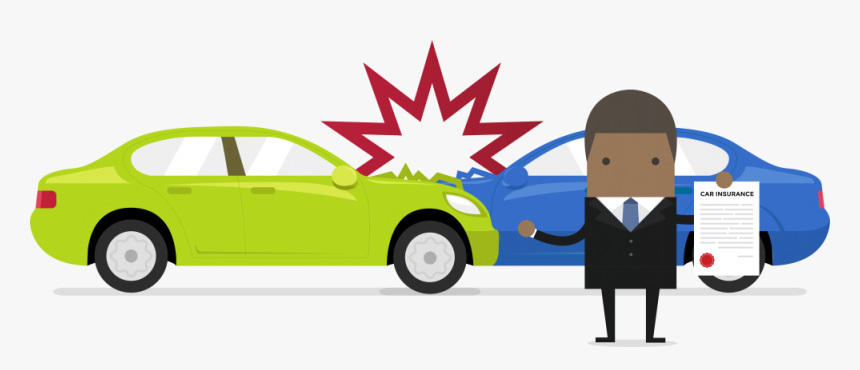

# Accident Severity Prediction Using Classification

Accident severity has been predicted using traditional methods of statistics in the past, such as logit algos, multinomial logit and logistic regression. However, these measures have been unable to predict non-linear relationships between independent factors that affect the causality of a road accident, thereby predicting inaccurate severity measures. The primary objective of this project is Data Preprocessing and an Exploratory Data Analysis of all independent variables that have been found to be highly related to the severity of an accident in the UK.

####**Table of Contents**

1.   Importing Libraries and Preparing Environment
2.   Business Objective
3.   Data Preparation
4.   Creating the new Feature Dataframe
5.   Splitting Data into Training and Testing
6.   Data Imputation
7.   Desriptive Statisitics on Training Dataset
8.   One Hot encoding
9.   Conclusion
10.   Data Exporting 

### **1.0 Importing Essential Libraries and Preparing Environment**

In [1]:
# Base Libraries
import re
import time 
import numpy as np
import pandas as pd
import statistics
import warnings
warnings.filterwarnings(action='ignore')

# Library for Plotting
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

# Library for Google Colab
from google.colab import drive

In [2]:
# Mount Google Drive on kernel
drive.mount('/content/gdrive')
path = "/content/gdrive/My Drive/Colab Notebooks/Content"

Mounted at /content/gdrive


In [3]:
Start_time = time.time()

In [4]:
# Decorator used to monitor how long each step of the ML Pipeline takes to run 
def time_step(fn):
  def wrapper(*args, **kwargs):
    start_time = time.time()
    result = fn(*args, **kwargs)
    end_time = time.time()
    time_taken = round(end_time - start_time, 4)
    if time_taken < 60:
      print(f'{fn.__name__} took {time_taken} seconds to run')
    else :
      print(f'{fn.__name__} took {time_taken/60} minutes to run')
    return result
  return wrapper

### **2.0 Business Objective**

Most car accident in the UK occur on high speed motorways in the countryside that are far from any hospital or emergency services reach. As a consequence, many chronic injuries are sustained, along with loss of life. Most injuries incured in car accidents can be prevented if proper care relief is provided at the right time.
In times of multiple car accident crashes in the vicinity of the nearest emergency service, the aid has only a limited number of resources, which cannot practically be disperesed to each accident site. A situation like this requires priority based response.

The objective of this project is to predict accident severity accurately based on predictor variables that can be obtained from the site of crash. The severity rating can then be used to prioritise dispatch of response team and organize first aid resources accordingly.
Furthermore, this report discusses the mapping of accident hotspots to encourage resource allocation in specific areas.

### **3.0 - Data Preparation**
**3.1 - Loading Data - UK Road Safety Data**

There are several datasets available on the UK Road Safety website so the group has decided to choose three datasets to maximise the effectiveness of the predictive model for the individual assignment.

The datasets are:

*   dft-road-casualty-statistics-accident-2020.csv
*   dft-road-casualty-statistics-casualty-2020.csv
*   dft-road-casualty-statistics-vehicle-2020.csv



In [5]:
# Loading the datasets into dataframes
accident_df = pd.read_csv("gdrive/MyDrive/Colab Notebooks/Content/dft-road-casualty-statistics-accident-2020.csv")
casualty_df = pd.read_csv("gdrive/MyDrive/Colab Notebooks/Content/dft-road-casualty-statistics-casualty-2020.csv")
vehicle_df = pd.read_csv("gdrive/MyDrive/Colab Notebooks/Content/dft-road-casualty-statistics-vehicle-2020.csv")

In [6]:
# Validating Accident Dataframe
accident_df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,10219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,10220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,10228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,10228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,10228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763


In [7]:
# Validating shape of Accident Dataframe
accident_df.shape

(91199, 36)

In [8]:
# Validating Casualty Dataframe
casualty_df.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3


In [9]:
# Validating shape of Casualty Dataframe
casualty_df.shape

(115584, 18)

In [10]:
# Validating Vehicle Dataframe
vehicle_df.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2020010219808,2020,10219808,1,9,9,5,1,5,0,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,2020010220496,2020,10220496,1,9,0,4,2,6,0,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,2020010228005,2020,10228005,1,9,0,18,-1,-1,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2020010228006,2020,10228006,1,8,0,18,1,5,0,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,2020010228011,2020,10228011,1,9,0,18,3,7,9,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1


In [11]:
# Validating shape of Vehicle Dataframe
vehicle_df.shape

(167375, 27)

### **4.0 Creating the New Feature Dataframe**

Upon a inspection, we can see that the Casualty and Vehicle Dataframe has the following features in common:

*   accident_index
*   accident_year
*   accidnet_reference
*   vehicle_reference

These will be used to merge them into a new dataframe


In [12]:
merged_df = pd.merge(vehicle_df,casualty_df, on=["accident_reference",
                                                 "accident_index","accident_year",
                                                 "vehicle_reference"], how="right")

A similar case is found for the newly created dataframe and the accident dataframe using that the main dataframe is created.

In [13]:
df = pd.merge(merged_df,accident_df, on=["accident_reference","accident_index",
                                         "accident_year"], how="right")

In [14]:
# Dropping rows with NaN values
df.dropna(inplace=True)

In [15]:
# Validating the newly created dataframe
df.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
17871,2020010278554,2020,010278554,2.0,3.0,0.0,6.0,7.0,7.0,0.0,...,0,4,1,2,0,0,1,1,2,E01000994
17872,2020010278556,2020,010278556,1.0,3.0,0.0,99.0,9.0,9.0,99.0,...,9,1,1,9,0,0,1,3,2,E01000927
17873,2020010278558,2020,010278558,1.0,3.0,0.0,15.0,3.0,7.0,0.0,...,5,4,1,2,0,0,1,1,2,E01004022
17874,2020010278559,2020,010278559,1.0,3.0,0.0,18.0,4.0,8.0,0.0,...,5,4,1,2,0,0,1,1,2,E01003151
17875,2020010278561,2020,010278561,1.0,11.0,0.0,7.0,5.0,7.0,0.0,...,5,4,8,2,0,0,1,1,2,E01001762


In [16]:
# Validating the shape of newly created dataframe
df.shape

(92433, 74)

**4.1 Preliminary Data Analysis**

Due to the large number of features available a preliminary data analysis is necessary to choose only the variables that are most useful for the predictive model.

This is done by considering the business objective and a correlation scores of the features with accident severity as the target variable.

In [17]:
# Correlation scores for accident_severity
corr = df.corr().round(2)
print(corr['accident_severity'].sort_values().to_string())

speed_limit                                   -0.12
urban_or_rural_area                           -0.12
number_of_casualties                          -0.12
age_of_casualty                               -0.07
light_conditions                              -0.06
vehicle_leaving_carriageway                   -0.06
age_band_of_casualty                          -0.06
police_force                                  -0.05
local_authority_district                      -0.05
casualty_class                                -0.05
pedestrian_location                           -0.05
age_of_driver                                 -0.05
age_band_of_driver                            -0.05
second_road_class                             -0.05
road_type                                     -0.04
latitude                                      -0.04
driver_home_area_type                         -0.04
location_northing_osgr                        -0.04
age_of_vehicle                                -0.03
pedestrian_m

**4.2 New Dataframe after Preliminary Analysis:**

In [18]:
# Droping duplicates from dataframe df
df.drop_duplicates(inplace=True)
# Resetting indices
df.reset_index(inplace=True)
# Creation of new dataframe
df_filtered = df[["first_point_of_impact", "trunk_road_flag", 
                  "urban_or_rural_area", "number_of_casualties",
                         "speed_limit", "age_band_of_casualty", 
                  "vehicle_leaving_carriageway", "light_conditions",
                         "local_authority_district", "casualty_class", 
                  "age_band_of_driver", "latitude","longitude",
                         "road_type", "driver_home_area_type", "age_of_vehicle",
                   "skidding_and_overturning",
                         "driver_imd_decile", "vehicle_type", 
                  "engine_capacity_cc", "weather_conditions",
                         "number_of_vehicles", 
                  "vehicle_location_restricted_lane",
                      "junction_location", "second_road_class", 
                  "junction_control", "sex_of_casualty",
                         "sex_of_driver",
                  "did_police_officer_attend_scene_of_accident",
                  "casualty_severity","accident_severity"]]

In [19]:
# Validating latest dataframe
df_filtered.head()

,first_point_of_impact,trunk_road_flag,urban_or_rural_area,number_of_casualties,speed_limit,age_band_of_casualty,vehicle_leaving_carriageway,light_conditions,local_authority_district,casualty_class,...,number_of_vehicles,vehicle_location_restricted_lane,junction_location,second_road_class,junction_control,sex_of_casualty,sex_of_driver,did_police_officer_attend_scene_of_accident,casualty_severity,accident_severity
0,3.0,2,1,1,20,5.0,0.0,4,20,1.0,...,2,0.0,0.0,6,-1,1.0,1.0,1,2.0,2
1,9.0,2,1,1,30,4.0,9.0,1,2,1.0,...,2,99.0,9.0,6,4,1.0,1.0,3,2.0,2
2,2.0,2,1,1,20,7.0,0.0,4,8,1.0,...,2,0.0,2.0,5,2,1.0,1.0,1,3.0,3
3,4.0,2,1,1,30,7.0,0.0,4,9,1.0,...,2,0.0,0.0,6,-1,1.0,1.0,1,3.0,3
4,4.0,2,1,1,20,7.0,0.0,4,4,3.0,...,1,0.0,2.0,6,2,1.0,1.0,1,2.0,2


In [20]:
# Validating shape of dataframe
df_filtered.shape

(92433, 31)

**4.3 Variable Notes**

The variables are narrowed down into 2 main types:
*   Categorical : Variables containing value indicating a category.
*   Numeric : Variables containing numeric values.

| Input Data | Definition | Category |
| --- | --- | --- |
| first_point_of_impact | Location of first impact | Categorical |
| trunk_road_flag | Whether road is under central government | Categorical |
| urban_or_rural_area | Whether driver is from rural or urban area | Categorical |
| number_of_casualties | Total number of casualties | Numeric |
| speed_limit | Speed limit of road | Numeric |
| age_band_of_casualty | Age group of casualty | Categorical |
| vehicle_leaving_carriageway | Displacement of vehicle from  carriageway | Categorical |
| light_conditions | Lighting conditions of road | Categorical |
| local_authority_district | District in which the accident happened | Categorical |
| casualty_class | Casualty group | Categorical |
| age_band_of_driver | Age group of driver | Categorical |
| latitude | Latitude values | Numeric |
| longitude | Logitude values | Numeric |
| road_type | Type of road | Categorical |
| driver_home_area_type | Residential Type of driver | Categorical |
| age_of_vehicle | How old is the vehicle | Numeric |
| skidding_and_overturning | Degree of skidding and overturning involved | Categorical |
| driver_imd_decile | Deprivation score of the area | Categorical |
| vehicle_type | Type of Vehicle | Numeric |
| engine_capacity_cc | Engine Capacity of Vehivle in cc | Numeric |
| weather_conditions | Weather Conditions | Categorical |
| number_of_vehicles | Number of Vehicles involved | Numeric |
| vehicle_location_restricted_lane | Whether the vehicle was in a restricted area | Categorical|
| junction_location | Location of nearest junction | Categorical |
| second_road_class | Location of nearest second road class | Categorical |
| junction_control | Location of nearest junction control | Categorical |
| sex_of_casualty | Gender of casualty | Categorical |
| did_police_officer_attend_scene_of_accident | Presence of Police in the accident scene | Categorical |
| casualty_severity | How severe is the casualty | Categorical |
| accident_severity | How severe is the accident | Categorical |

**3.4 Further Data Preprocessing**

Several of the data has values which signifies missing or unknown values this will be replace with NaN which will later be imputed. The function given below will be used for this. 

In [21]:
# Function which replaces missing or unknown values with NaN
def initialising_nan(dataframe, column_name, value_data):
    for value in value_data:
        dataframe.loc[dataframe[column_name] == value, column_name] = np.nan

Each of the features are analysed and the depending on the results the function is used on them accordingly.

In [22]:
# "First point of impact"
# =======================
# identifying the missing and unknown values
print(df_filtered["first_point_of_impact"].value_counts())
# modifying missing and unknown values in first point of impact feature
# modifying the missing and unknown values by null values for succeeding imputation
initialising_nan(df_filtered, "first_point_of_impact", [-1, 9]) 

 1.0    47541
 2.0    15477
 3.0    12653
 4.0    12011
 0.0     3668
 9.0      562
-1.0      521
Name: first_point_of_impact, dtype: int64


In [23]:
# "Trunk road flag"
# =================
# identifying the missing and unknown values
print(df_filtered["trunk_road_flag"].value_counts())
# modifying the missing and unknown values by null values for succeeding imputation
initialising_nan(df_filtered, "trunk_road_flag", [-1])


 2    78682
 1     7715
-1     6036
Name: trunk_road_flag, dtype: int64


In [24]:
# "Urban or rural area"
# =====================
# Identifying the missing and unknown values
print(df_filtered["urban_or_rural_area"].value_counts())
# since there are no missing and unknown values there is no data cleaning required

1    53546
2    38887
Name: urban_or_rural_area, dtype: int64


In [25]:
# "Speed limit"
# =============
# identifying the missing and unknown values
print(df_filtered["speed_limit"].value_counts())
# modifying the missing and unknown values by null values for succeeding imputation
initialising_nan(df_filtered, "speed_limit", [-1])

 30    51057
 60    15420
 40     9403
 70     6632
 20     5150
 50     4762
-1         9
Name: speed_limit, dtype: int64


In [26]:
# "Age band of casualty"
# ======================
# identifying the missing and unknown values
print(df_filtered["age_band_of_casualty"].value_counts())
# modifying the missing and unknown values by null values for succeeding imputation
initialising_nan(df_filtered, "age_band_of_casualty", [-1])

 6.0     19080
 7.0     13689
 8.0     12700
 5.0     10656
 4.0      9872
 9.0      8745
 10.0     4726
 3.0      4131
 11.0     3594
 2.0      2214
 1.0      1538
-1.0      1488
Name: age_band_of_casualty, dtype: int64


In [27]:
# "Vehicle leaving carriageway"
# ============================
# identifying the missing and unknown values
print(df_filtered["vehicle_leaving_carriageway"].value_counts())
# modifying the missing and unknown values by null values for succeeding imputation
initialising_nan(df_filtered, "vehicle_leaving_carriageway", [-1])

 0.0    73758
 1.0     8886
 7.0     4513
 2.0     1271
 9.0     1226
 3.0      746
 8.0      685
 4.0      476
-1.0      381
 5.0      360
 6.0      131
Name: vehicle_leaving_carriageway, dtype: int64


Similarly, all the categorical data feautres will be changed in this manner.

In [28]:
# "Light conditions"
# ==================
initialising_nan(df_filtered, "light_conditions", [-1])

In [29]:
# "Local authority district"
# ==========================
df_filtered = df_filtered.drop("local_authority_district", axis=1)
# Since the are too many coloumns to be considered in local authority district, it is dropped.

In [30]:
# "Casualty class"
# ================
# identifying the missing and unknown values
print(df_filtered["casualty_class"].value_counts())
# since there are no missing and unknown values there is no data cleaning required

1.0    63071
2.0    18026
3.0    11336
Name: casualty_class, dtype: int64


In [31]:
# " Age band of driver "
# ======================
initialising_nan(df_filtered, "age_band_of_driver", [-1])

In [32]:
# "Latitude"
# ==========
# Identifying the missing and unknown values
print(df_filtered["latitude"].value_counts())
# since there are no missing and unknown values there is no data cleaning required

51.085841    41
56.548322    19
53.371086    17
51.244606    13
50.901729    12
             ..
53.116445     1
53.058711     1
53.110280     1
53.112311     1
54.837812     1
Name: latitude, Length: 70429, dtype: int64


In [33]:
# "Longitude"
# ===========
# Identifying the missing and unknown values
print(df_filtered["longitude"].value_counts())
# since there are no missing and unknown values there is no data cleaning required

-1.314431    41
-2.939728    19
-1.386526    17
 0.971182    13
-0.057917    12
             ..
-2.026492     1
-2.163295     1
-2.185015     1
-2.152020     1
-4.050270     1
Name: longitude, Length: 70620, dtype: int64


In [34]:
# "Road type"
# ===========
initialising_nan(df_filtered, "road_type", [9])

In [35]:
# "Driver home area type"
# =======================
initialising_nan(df_filtered, "driver_home_area_type", [-1])

In [36]:
# "Age of vehicle"
# ================
initialising_nan(df_filtered, "age_of_vehicle", [-1])

In [37]:
# "Skidding and overturning"
# ==========================
initialising_nan(df_filtered, "skidding_and_overturning", [-1, 9])

In [38]:
# "Driver imd decile"
# ===================
initialising_nan(df_filtered, "driver_imd_decile", [-1])

In [39]:
# "Vehicle type"
# ==============
# Identifying the missing and unknown values
df_filtered = df_filtered.drop("vehicle_type", axis=1)
# Since the are too many coloumns to be considered in vehicle type, it is dropped.

In [40]:
# "Engine capacity cc"
# ====================
initialising_nan(df_filtered, "engine_capacity_cc", [-1])

In [41]:
# "Weather conditions"
# ====================
initialising_nan(df_filtered, "weather_conditions", [-1, 9])

In [42]:
# "Number of vehicles"
# ====================
# Identifying the missing and unknown values
print(df_filtered["number_of_vehicles"].value_counts())
# Since there are no outliers and no removal required

2     57165
1     23736
3      8618
4      2075
5       511
6       208
7        53
8        40
10        9
9         9
11        6
13        2
12        1
Name: number_of_vehicles, dtype: int64


In [43]:
# "Vehicle Location Restricted Lane"
# ==================================
initialising_nan(df_filtered, "vehicle_location_restricted_lane", [-1, 99])

In [44]:
# "Junction Location"
# ===================
initialising_nan(df_filtered, "junction_location", [-1, 99])

In [45]:
# "Second road class"
# ===================
# Identifying the missing and unknown values
print(df_filtered["second_road_class"].value_counts())
# since there are no missing and unknown values there is no data cleaning required

6    78154
3     8112
4     3651
5     2057
1      410
2       49
Name: second_road_class, dtype: int64


In [46]:
# "Junction Control"
# ==================
# Identifying the missing and unknown values
print(df_filtered["junction_control"].value_counts())
# Since there are a lot of missing values, it will be dropped
df_filtered = df_filtered.drop("junction_control", axis=1)

-1    43567
 4    39318
 2     8480
 3      488
 1      328
 9      252
Name: junction_control, dtype: int64


In [47]:
# "Sex of Casualty"
# ==================
initialising_nan(df_filtered, "sex_of_casualty", [-1, 9])
# "Sex of Driver"
# ==================
initialising_nan(df_filtered, "sex_of_driver", [-1, 3])

In [48]:
# "Did Police Officer Attend Scene of Accident"
# ==============================================
initialising_nan(df_filtered, "did_police_officer_attend_scene_of_accident", [-1])
# the value of 3 in this categorical dataset is close to 2 hence modifying the dataset
df_filtered.loc[df_filtered["did_police_officer_attend_scene_of_accident"] == 3,
                "did_police_officer_attend_scene_of_accident"] = 2

Feature with an outlier:

In [49]:
# "Number of casualties"
# ======================
# Identifying the outliers
print(df_filtered["number_of_casualties"].value_counts())

1     56930
2     20666
3      8409
4      3692
5      1510
6       624
7       287
8        96
9        54
41       41
11       33
10       30
19       19
17       17
13       13
12       12
Name: number_of_casualties, dtype: int64


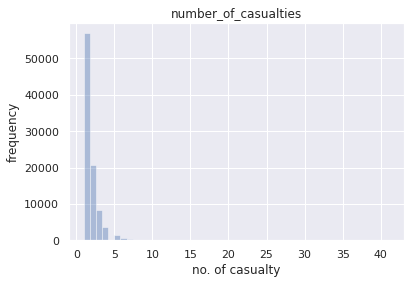

In [50]:
# Histogram
# Define plot object
hist = sns.distplot(df_filtered.loc[:, 'number_of_casualties'].astype(float), kde=False)
# Setting graph title
hist.set_title('number_of_casualties')
hist.set(xlabel='no. of casualty', ylabel='frequency')
plt.show()
# Removing outliers
df_filtered = df_filtered[df_filtered.number_of_casualties != 41]

In [51]:
# Checking if the outlier got removed
print(df_filtered["number_of_casualties"].value_counts())

1     56930
2     20666
3      8409
4      3692
5      1510
6       624
7       287
8        96
9        54
11       33
10       30
19       19
17       17
13       13
12       12
Name: number_of_casualties, dtype: int64


### **5.0 Splitting Data into Training and Testing**

The dataset is split into train and test data for training and testing the predictive model.


In [52]:
# Importing necessary libraries
from numpy.ma.core import shape
from sklearn.model_selection import train_test_split

# Converting the data set into predictor and target variables based on accident severity as target
X_accident = df_filtered.drop("accident_severity", axis=1)
y_accident = df_filtered["accident_severity"]

# Splitting into train and test set based on casualty severity as the target variable
x_accident_train, x_accident_test, y_accident_train, y_accident_test = \
train_test_split(X_accident, y_accident, test_size=0.3, random_state=42)

In [53]:
# Shape of the resultant dataframes
print(x_accident_train.shape)
print(x_accident_test.shape)
print(y_accident_train.shape)
print(y_accident_test.shape)

(64674, 27)
(27718, 27)
(64674,)
(27718,)


##**6.0 Data Imputation**

Imputation is a technique used for replacing the missing data with some substitute value to retain most of the data/information of the dataset. Both numerical and categorical imputation is done on the dataset.


In [54]:
# Data imputation
# ===============

# Loading libarary for imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# we create a temporary dataframe with only numerical columns,
# but keep the categorical columns in a separate variable
trainset_numerical = x_accident_train[["speed_limit", "age_of_vehicle", 
                                       "engine_capacity_cc", 
                                       "number_of_casualties", 
                                       "number_of_vehicles"]]
testset_numerical = x_accident_test[["speed_limit", "age_of_vehicle", 
                                     "engine_capacity_cc", 
                                     "number_of_casualties", 
                                     "number_of_vehicles"]]
trainset_categorical = x_accident_train.drop(["speed_limit", "age_of_vehicle", 
                                              "engine_capacity_cc", 
                                              "number_of_casualties", 
                                              "number_of_vehicles"], axis=1)
testset_categorical = x_accident_test.drop(["speed_limit", "age_of_vehicle", 
                                            "engine_capacity_cc", 
                                            "number_of_casualties", 
                                            "number_of_vehicles"], axis=1)

categorical_columns = list(trainset_categorical.columns)

# Numerical dataset imputation
transformed_train_numerical = imputer.fit_transform(trainset_numerical)
transformed_test_numerical = imputer.transform(testset_numerical)
x_accident_train_numerical = pd.DataFrame(transformed_train_numerical,
                                          columns=["speed_limit", "age_of_vehicle", 
                                                   "engine_capacity_cc", 
                                                   "number_of_casualties", 
                                                   "number_of_vehicles"])
x_accident_test_numerical = pd.DataFrame(transformed_test_numerical,
                                          columns=["speed_limit", "age_of_vehicle", 
                                                   "engine_capacity_cc", 
                                                   "number_of_casualties", 
                                                   "number_of_vehicles"])

# Categorical dataset imputation
imputer = SimpleImputer(strategy="most_frequent")
transformed_train_categorical = imputer.fit_transform(trainset_categorical)
transformed_test_categorical = imputer.transform(testset_categorical)
x_accident_train_categorical = pd.DataFrame(transformed_train_categorical, 
                                            columns=categorical_columns)
x_accident_test_categorical = pd.DataFrame(transformed_test_categorical,
                                           columns=categorical_columns)

# Merging numerical and categorical dataframes
x_accident_train = pd.merge(x_accident_train_numerical,x_accident_train_categorical, 
                            left_index=True, right_index=True, how='outer')
x_accident_test = pd.merge(x_accident_test_numerical,x_accident_test_categorical,
                           left_index=True, right_index=True, how='outer')

### **7.0 Desriptive Statisitics on Training Dataset**

This section conducts an Exploratory Data Analysis on the variables of the dataframe one at a time. The analysis is separated into dependent variable, numeric independent variables and categorical independant variables. Using this analysis, a set number of variables will be used in the predictive model.


Histogram and box plots are given for each of the numerical variables to illustrate their skewness and to visualise any outliers.

Bar charts are given for each of the categorical variables to illustrate their value counts.

Every analysis done in the section is done on x_accident_train and y_accident_train dataframes.

For the first purpose of the analysis, the following functions were created:




In [55]:
# Function for plotting numerical variables
# ==========================================
def numerical_plot(dataframe, column_name):
    pd.DataFrame(dataframe.loc[:, column_name].describe())
    heading = column_name.replace('_', ' ')
    fig = plt.figure(figsize=(15, 5))
    # Histogram
    plt.subplot(1, 2, 1)
    # Define plot object
    hist = sns.distplot(x_accident_train.loc[:, column_name], bins=100)
    # Setting graph title
    hist.set_title('Average {}'.format(heading))
    hist.set(xlabel='{}'.format(heading), ylabel='Frequency')
    # Boxplot
    plt.subplot(1, 2, 2)
    # Define plot object
    box = sns.boxplot(x_accident_train.loc[:, column_name])
    # Setting graph title
    box.set_title('Average {}'.format(heading))
    box.set(xlabel='{}'.format(heading), ylabel='Frequency')
    # Showing the plot
    plt.show()

In [56]:
# Function for plotting categorical variables
# ============================================
def categorical_plot(dataframe, column_name, labels, bins):
    heading = column_name.replace('_', ' ')
    plot_usage_dataframe = pd.cut(dataframe[column_name], bins=bins, labels=labels)
    # Plotting the bar graph to display the frequency of impact on each portion of the vehicle
    plot_usage_dataframe.value_counts().plot(kind='bar')
    plt.title(label=column_name)
    plt.xlabel(xlabel='{}'.format(heading))
    plt.ylabel(ylabel='Frequency')
    plt.show()


**7.1 Dependent Variable**

The dependent variable chosen for the predictive model is accident_severity.

**7.2 Numeric Independent Variables**

The following columns are Numeric Independent Variables and are investigated below.

*   number_of_casualties
*   speed_limit
*   age_of_vehicle
*   engine_capacity_cc
*   number_of_vehicles

Numerical predictors are decribed using box plots and distplots to better understand the distribution of values.

**7.2.1 Number of Casualties**

Descriptive statistics of Number of Casualties.

In [57]:
pd.DataFrame(x_accident_train.number_of_casualties.describe())

,number_of_casualties
count,64674.000000
mean,1.674692
std,1.157310
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,19.000000


The distribution and skewness of this variable are illustrated by the histogram and box plot below.

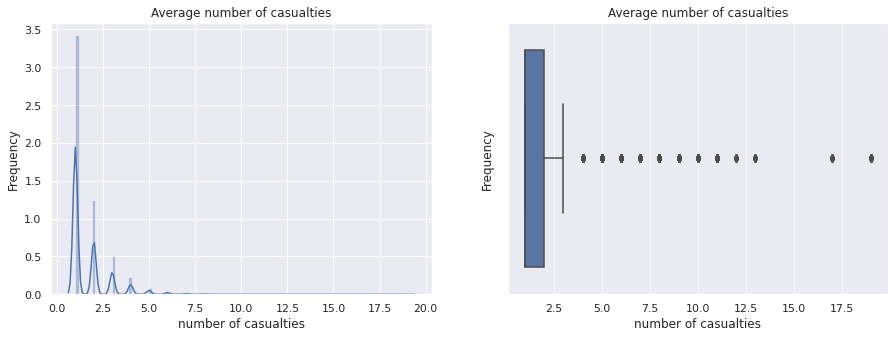

In [58]:
numerical_plot(x_accident_train,'number_of_casualties')

The number of casualties are distributed with left- skewness as observed from the distplots and outliers can be seen from the box plots with an inter quartile range lying between 1-3.

**7.2.2 Speed Limit**

Descriptive statistics of Speed Limit.

In [59]:
pd.DataFrame(x_accident_train.speed_limit.describe())

,speed_limit
count,64674.000000
mean,39.394966
std,14.618378
min,20.000000
25%,30.000000
50%,30.000000
75%,50.000000
max,70.000000


The distribution and skewness of this variable are illustrated by the histogram and box plot below.

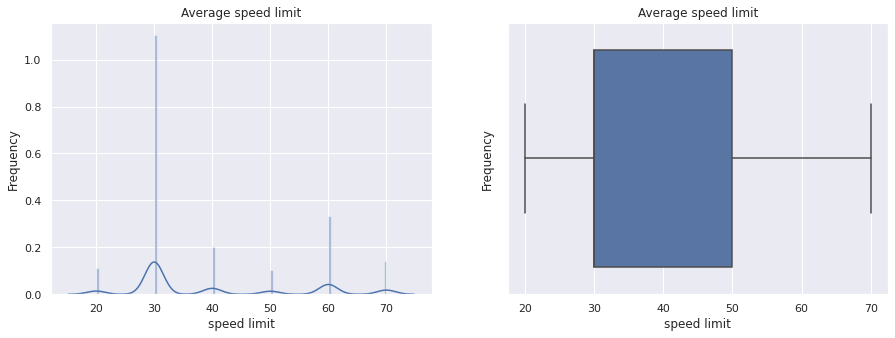

In [60]:
numerical_plot(x_accident_train, 'speed_limit')

No outliers found with an relatively normal distribution.
Distplots display a bi-modal characteristic.

**7.2.3 Age of Vehicle**

Descriptive statistics of age of the vehicle.

In [61]:
pd.DataFrame(x_accident_train.age_of_vehicle.describe())

,age_of_vehicle
count,64674.000000
mean,8.449686
std,5.096716
min,0.000000
25%,5.000000
50%,8.000000
75%,11.000000
max,96.000000


The distribution and skewness of this variable are illustrated by the histogram and box plot below.

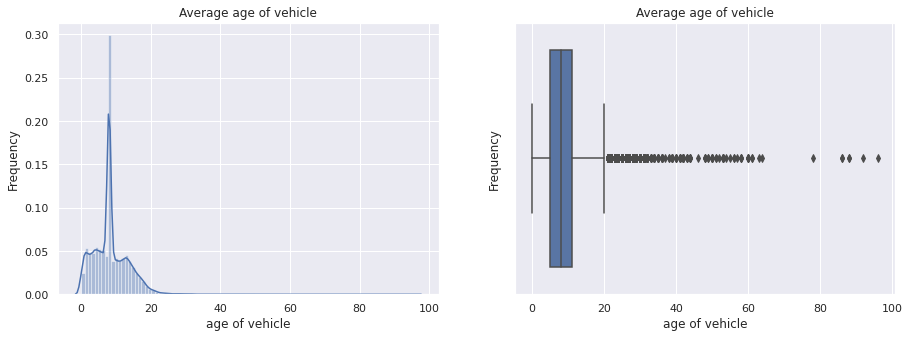

In [62]:
numerical_plot(x_accident_train, 'age_of_vehicle')

The median value is very close to the mean value suggesting an even distribution, however the maximum value being 96 suggest presence of outliers.

**7.2.4 Engine Capacity (cc)**

Descriptive statistics of Engine Capacity.

In [63]:
pd.DataFrame(x_accident_train.engine_capacity_cc.describe())

,engine_capacity_cc
count,64674.000000
mean,1621.544361
std,1013.544968
min,48.000000
25%,1332.000000
50%,1560.000000
75%,1796.000000
max,16400.000000


The distribution and skewness of this variable are illustrated by the histogram and box plot below.

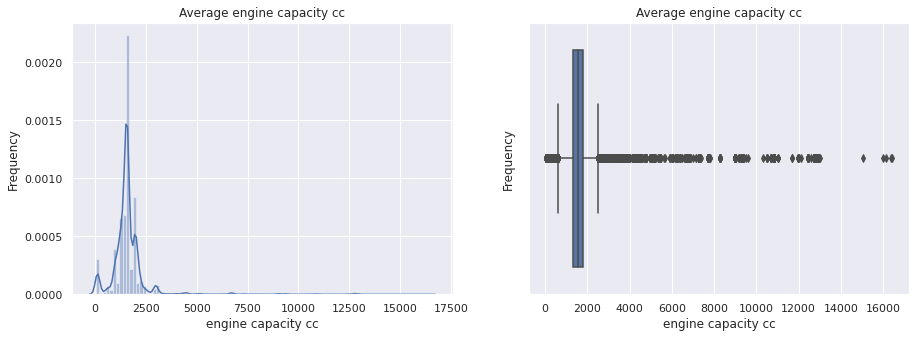

In [64]:
numerical_plot(x_accident_train, 'engine_capacity_cc')

Both distplots and boxplot and interestingly populated observations in a very small range between 1000-2000, which causes a plethora of outliers outside this range, suggesting the need to normalise the data.

**7.2.5 Number of Vehicles**

Descriptive statistics of Number of Vehicles.

In [65]:
pd.DataFrame(x_accident_train.number_of_vehicles.describe())

,number_of_vehicles
count,64674.000000
mean,1.916350
std,0.755002
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,13.000000


The distribution and skewness of this variable are illustrated by the histogram and box plot below.

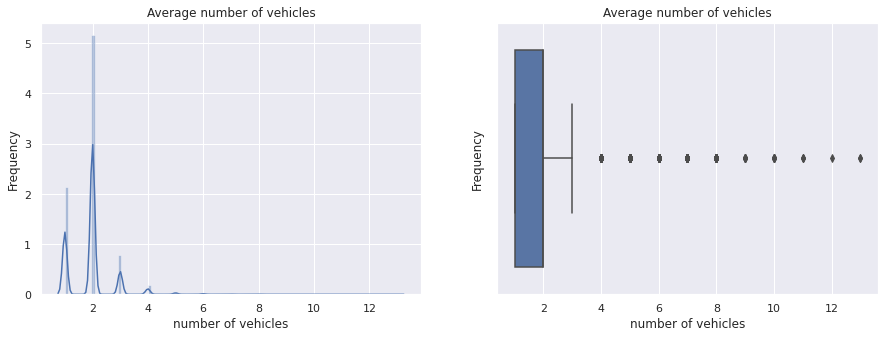

In [66]:
numerical_plot(x_accident_train, 'number_of_vehicles')

Right skewed behaviour which can be validated using the box plot, suggesting the rarity of the accidents with more than 3 vehicles involved.

**7.3 Categorical Independent Variables**

The following coloumns are Categorical Independent Variables and are investigated below.


*   first_point_of_impact
*   trunk_road_flag
*   urban_or_rural_area
*   age_band_of_casualty
*   vehicle_leaving_carriageway
*   light_conditions
*   casualty_class
*   age_band_of_driver
*   road_type
*   driver_home_area_type
*   skidding_and_overturning
*   driver_imd_decile
*   weather_conditions
*   vehicle_location_restricted_lane
*   junction_location
*   second_road_class
*   sex_of_casualty
*   did_police_officer_attend_scene_of_accident
*   casualty_severity




**7.3.1 First Point of Impact**

Descriptive statistics and value counts for First point of Impact variable.

In [67]:
pd.DataFrame(x_accident_train.first_point_of_impact.describe())

,first_point_of_impact
count,64674.000000
mean,1.792977
std,1.138291
min,0.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,4.000000


The plot below illustrates the 'counts' for this variable.

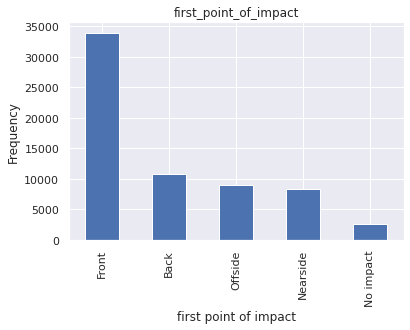

In [68]:
categorical_plot(x_accident_train, 'first_point_of_impact',
                  ['No impact', 'Front', 'Back', 'Offside', 'Nearside'], 5)

Most of First point of Impacts are on the front of the vehicle.



**7.3.2 Trunk Road Flag**

Descriptive statistics and value counts for Trunk Road Flag variable.

In [69]:
pd.DataFrame(x_accident_train.trunk_road_flag.describe())

,trunk_road_flag
count,64674.000000
mean,1.916597
std,0.276492
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


The plot below illustrates the 'counts' for this variable.

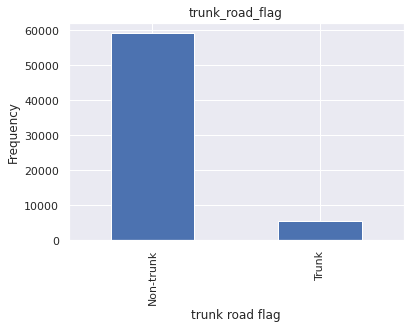

In [70]:
categorical_plot(x_accident_train, 'trunk_road_flag', ['Trunk', 'Non-trunk'], 2)

Most of the accidents have occured on Non-Trunk Roads.

**7.3.3 Urban or Rural Area**

Descriptive statistics and value counts for Urban or Rural Area variable.

In [71]:
pd.DataFrame(x_accident_train.urban_or_rural_area.describe())

,urban_or_rural_area
count,64674.000000
mean,1.420617
std,0.493662
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


The plot below illustrates the 'counts' for this variable.

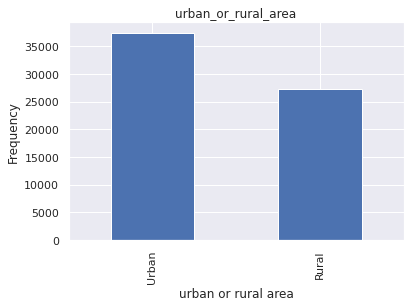

In [72]:
categorical_plot(x_accident_train, 'urban_or_rural_area', ['Urban', 'Rural'], 2)

Most of the accidents have occured in Urban areas but rural incidents are just a bit less frequent.

**7.3.4 Age Band of Casualty**

Descriptive statistics and value counts for Age Band of Casualty variable.

In [73]:
pd.DataFrame(x_accident_train.age_band_of_casualty.describe())

,age_band_of_casualty
count,64674.000000
mean,6.470591
std,2.208037
min,1.000000
25%,5.000000
50%,6.000000
75%,8.000000
max,11.000000


The plot below illustrates the 'counts' for this variable.

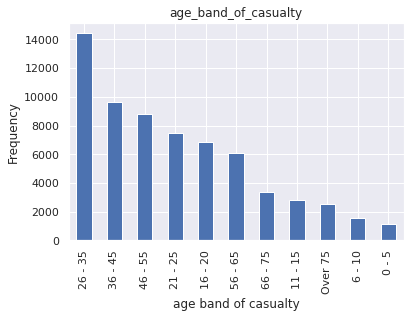

In [74]:
categorical_plot(x_accident_train, 'age_band_of_casualty', ["0 - 5", "6 - 10", 
                                                            "11 - 15", "16 - 20", 
                                                            "21 - 25",
                                                                "26 - 35", 
                                                            "36 - 45", "46 - 55", 
                                                            "56 - 65", "66 - 75",
                                                                "Over 75"], 11)

The age band involved with the most number of accidents is between 26 - 35.

**7.3.5 Vehicle Leaving Carriageway**

Descriptive statistics and value counts for Vehicle Leaving Carriageway variable.

In [75]:
pd.DataFrame(x_accident_train.vehicle_leaving_carriageway.describe())

,vehicle_leaving_carriageway
count,64674.000000
mean,0.713904
std,1.966079
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9.000000


The plot below illustrates the 'counts' for this variable.

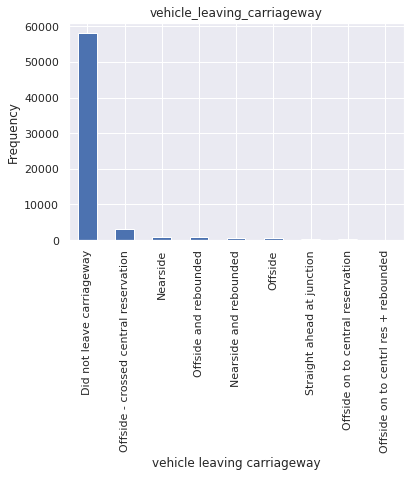

In [76]:
categorical_plot(x_accident_train, 'vehicle_leaving_carriageway', ["Did not leave carriageway", "Nearside",
                                                                       "Nearside and rebounded",
                                                                       "Straight ahead at junction",
                                                                       "Offside on to central reservation",
                                                                       "Offside on to centrl res + rebounded",
                                                                       "Offside - crossed central reservation",
                                                                       "Offside", "Offside and rebounded"], 9)

It can be observed that most vehicles did not leave the carriageway.

**7.3.6 Light Conditions**

Descriptive statistics and value counts for Light Conditions variable.

In [77]:
pd.DataFrame(x_accident_train.light_conditions.describe())

,light_conditions
count,64674.000000
mean,2.110910
std,1.784241
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,7.000000


The plot below illustrates the 'counts' for this variable.

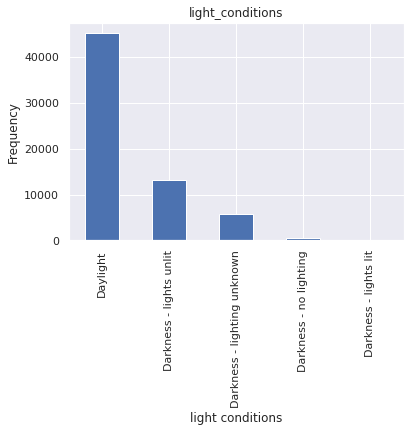

In [78]:
categorical_plot(x_accident_train, 'light_conditions', ["Daylight", 
                                                        "Darkness - lights lit",
                                                      "Darkness - lights unlit", 
                                                      "Darkness - no lighting",
                                                    "Darkness - lighting unknown"], 5)

Most of the accidents have occurred during Daylight hours.

**7.3.7 Casualty Class**

Descriptive statistics and value counts for Casualty Class variable.

In [79]:
pd.DataFrame(x_accident_train.casualty_class.describe())

,casualty_class
count,64674.000000
mean,1.440208
std,0.701671
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


The plot below illustrates the 'counts' for this variable.

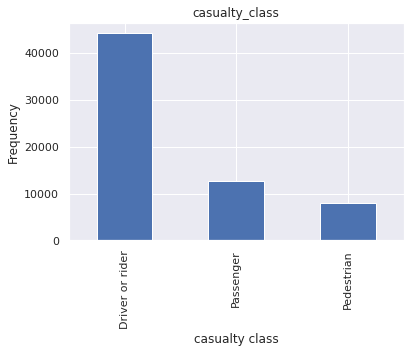

In [80]:
categorical_plot(x_accident_train, 'casualty_class', ["Driver or rider", 
                                                      "Passenger", 
                                                      "Pedestrian"], 3)

The most occuring casualty class is the Driver or rider of the vehicle.

**7.3.8 Age Band of Driver**

Descriptive statistics and value counts for Age Band of Driver variable.

In [81]:
pd.DataFrame(x_accident_train.age_band_of_driver.describe())

,age_band_of_driver
count,64674.000000
mean,6.794338
std,1.832517
min,1.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,11.000000


The plot below illustrates the 'counts' for this variable.

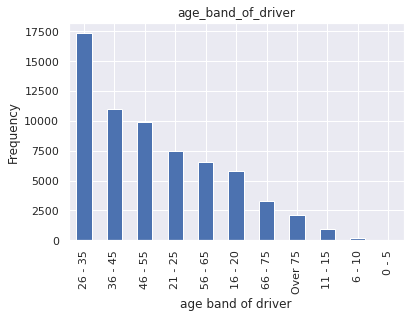

In [82]:
categorical_plot(x_accident_train, 'age_band_of_driver', ["0 - 5", "6 - 10", 
                                                          "11 - 15", "16 - 20", 
                                                          "21 - 25",
                                                              "26 - 35", 
                                                          "36 - 45", "46 - 55", 
                                                          "56 - 65", "66 - 75",
                                                              "Over 75"], 11)

The age band involved with the most number of accidents is between 26 - 35.

**7.3.9 Road Type**

Descriptive statistics and value counts for Road Type variable.

In [83]:
pd.DataFrame(x_accident_train.road_type.describe())

,road_type
count,64674.000000
mean,5.231546
std,1.543195
min,1.000000
25%,6.000000
50%,6.000000
75%,6.000000
max,7.000000


The plot below illustrates the 'counts' for this variable.

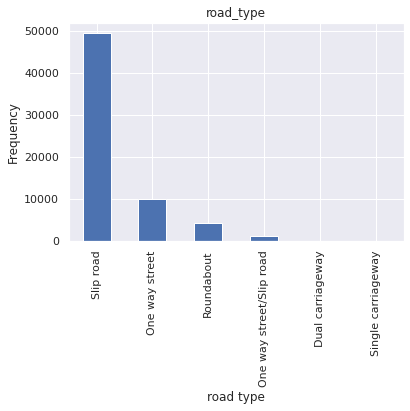

In [84]:
categorical_plot(x_accident_train, 'road_type', ["Roundabout", 
                                                 "One way street", 
                                                 "Dual carriageway",
                                                "Single carriageway", 
                                                 "Slip road", 
                                                 "One way street/Slip road"], 6)

Most of the accidents occur on  Slip Roads.

**7.3.10 Driver Home Area Type**

Descriptive statistics and value counts for Driver Home Area Type variable.

In [85]:
pd.DataFrame(x_accident_train.driver_home_area_type.describe())

,driver_home_area_type
count,64674.000000
mean,1.319541
std,0.666908
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


The plot below illustrates the 'counts' for this variable.

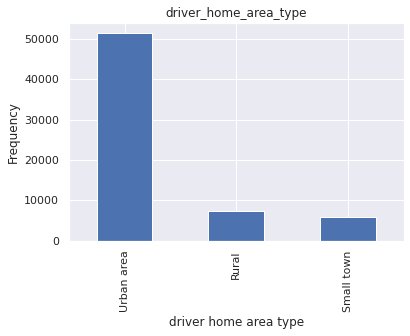

In [86]:
categorical_plot(x_accident_train, 'driver_home_area_type', 
                 ["Urban area", "Small town", "Rural"], 3)

Most of the accidents occur in Urban areas.

**7.3.11 Skidding and Overturning**

Descriptive statistics and value counts for Skidding and Overturning variable.

In [87]:
pd.DataFrame(x_accident_train.skidding_and_overturning.describe())

,skidding_and_overturning
count,64674.000000
mean,0.364582
std,1.060495
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5.000000


The plot below illustrates the 'counts' for this variable.

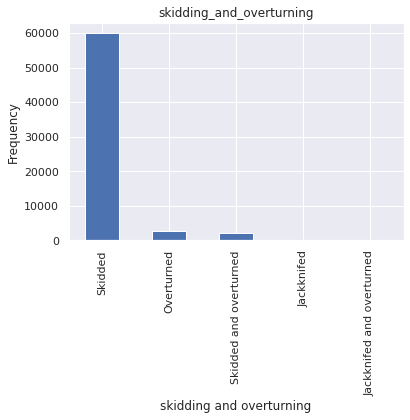

In [88]:
categorical_plot(x_accident_train, 'skidding_and_overturning',
                     ['Skidded', 'Skidded and overturned', 'Jackknifed', 
                      'Jackknifed and overturned', 'Overturned'], 5)

Most of the Vehicles have just skidded during an accident.

**7.3.12 Driver imd Decile**

Descriptive statistics and value counts for Driver imd Decile variable.

In [89]:
pd.DataFrame(x_accident_train.skidding_and_overturning.describe())

,skidding_and_overturning
count,64674.000000
mean,0.364582
std,1.060495
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5.000000


The plot below illustrates the 'counts' for this variable.

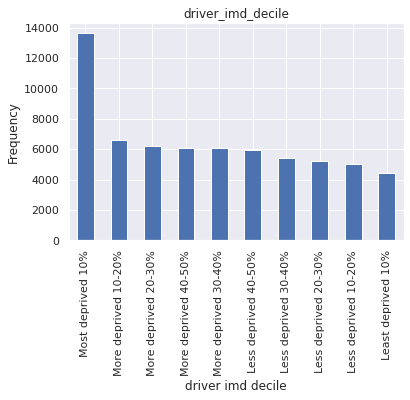

In [90]:
categorical_plot(x_accident_train, 'driver_imd_decile',
                     ['Most deprived 10%', 'More deprived 10-20%', 
                      'More deprived 20-30%', 'More deprived 30-40%',
                      'More deprived 40-50%', 'Less deprived 40-50%', 
                      'Less deprived 30-40%', 'Less deprived 20-30%',
                      'Less deprived 10-20%', 'Least deprived 10%'], 10)

The highest number of incidents have occured in the most deprived 10% areas but the other areas are more or less equally distributed.

**7.3.13 Weather Conditions**

Descriptive statistics and value counts for Weather Conditions variable.

In [91]:
pd.DataFrame(x_accident_train.weather_conditions.describe())

,weather_conditions
count,64674.000000
mean,1.482497
std,1.353901
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,8.000000


The plot below illustrates the 'counts' for this variable.

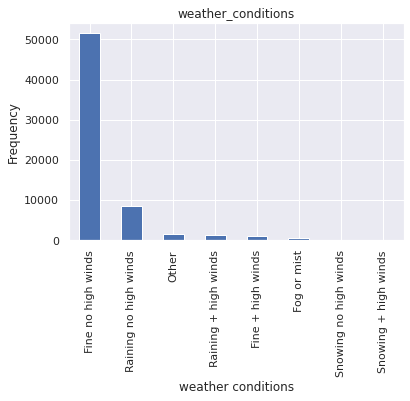

In [92]:
categorical_plot(x_accident_train, 'weather_conditions',
                     ["Fine no high winds", "Raining no high winds", 
                      "Snowing no high winds", "Fine + high winds",
                      "Raining + high winds", "Snowing + high winds", 
                      "Fog or mist", "Other"], 8)

Most of the accidents happened when the weather was fine with no high winds.

**7.3.14 Vehicle Location Restricted Lane**

Descriptive statistics and value counts for Vehicle Location Restricted Lane variable.

In [93]:
pd.DataFrame(x_accident_train.vehicle_location_restricted_lane.describe())

,vehicle_location_restricted_lane
count,64674.000000
mean,0.198673
std,1.238334
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9.000000


The plot below illustrates the 'counts' for this variable.

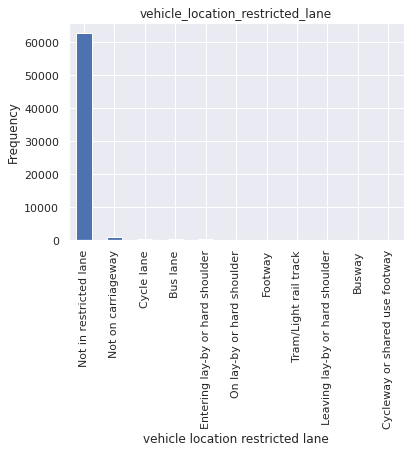

In [94]:
categorical_plot(x_accident_train, 'vehicle_location_restricted_lane',
                     ["Not in restricted lane", "Tram/Light rail track", 
                      "Bus lane", "Busway", "Cycle lane",
                      "Cycleway or shared use footway", 
                      "On lay-by or hard shoulder",
                      "Entering lay-by or hard shoulder", 
                      "Leaving lay-by or hard shoulder", "Footway",
                      "Not on carriageway"], 11)

Most of the vehicles were not in the restricted lane when it got into an acciendent.

**7.3.15 Junction Location**

Descriptive statistics and value counts for Junction Location variable.

In [95]:
pd.DataFrame(x_accident_train.junction_location.describe())

,junction_location
count,64674.000000
mean,2.222933
std,3.097086
min,0.000000
25%,0.000000
50%,1.000000
75%,4.000000
max,9.000000


The plot below illustrates the 'counts' for this variable.

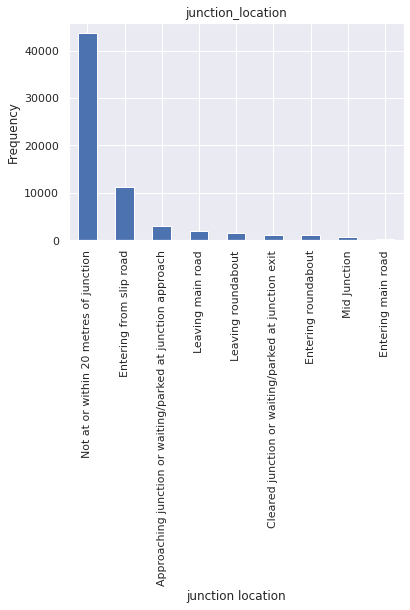

In [96]:
categorical_plot(x_accident_train, 'junction_location',
                     ["Not at or within 20 metres of junction",
                      "Approaching junction or waiting/parked at junction approach",
                      "Cleared junction or waiting/parked at junction exit", 
                      "Leaving roundabout", "Entering roundabout"
                         , "Leaving main road", "Entering main road", 
                      "Entering from slip road", "Mid Junction"], 9)

Most of the vehicles were not at or within 20 metres of a junction when it met with an accident.

**7.3.16 Second Road Class**

Descriptive statistics and value counts for Second Road Class variable.


In [97]:
pd.DataFrame(x_accident_train.second_road_class.describe())

,second_road_class
count,64674.000000
mean,5.609797
std,0.969378
min,1.000000
25%,6.000000
50%,6.000000
75%,6.000000
max,6.000000


The plot below illustrates the 'counts' for this variable.

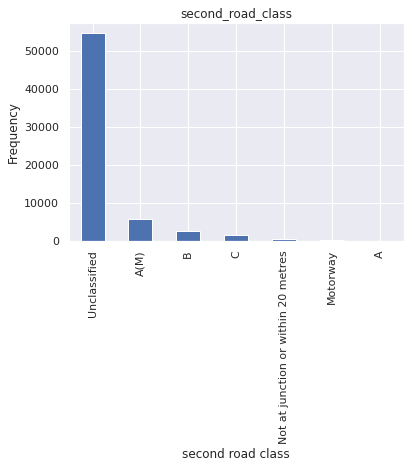

In [98]:
categorical_plot(x_accident_train, 'second_road_class',
                     ["Not at junction or within 20 metres", "Motorway", 
                      "A(M)", "A", "B", "C", "Unclassified"], 7)

Most of the vehicles were not at or within 20 metres of a junction when it met with an accident.

**7.3.17 Sex of Casualty**

Descriptive statistics and value counts for Sex of Casualty variable.

In [99]:
pd.DataFrame(x_accident_train.sex_of_casualty.describe())

,sex_of_casualty
count,64674.000000
mean,1.381513
std,0.485762
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


The plot below illustrates the 'counts' for this variable.

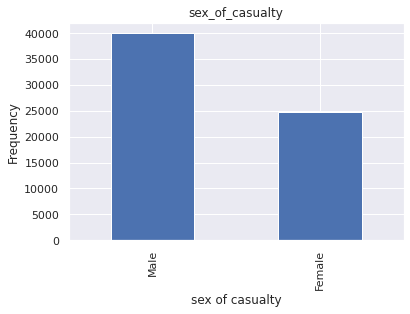

In [100]:
categorical_plot(x_accident_train, 'sex_of_casualty', ["Male", "Female"], 2)

More males are involved in accidents compared to females.

**7.3.18 Did Police Officer Attend Scene of Accident**

Descriptive statistics and value counts for Did Police Officer Attend Scene of Accident variable.


In [101]:
pd.DataFrame(x_accident_train.did_police_officer_attend_scene_of_accident.describe())

,did_police_officer_attend_scene_of_accident
count,64674.000000
mean,1.268763
std,0.443320
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


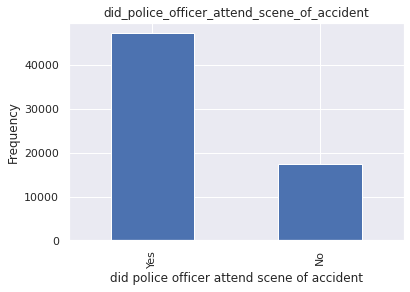

In [102]:
categorical_plot(x_accident_train, 'did_police_officer_attend_scene_of_accident', ["Yes", "No"], 2)

In most of the cases, a police had attended the scene of the accident.

**7.3.19 Casualty Severity**

Descriptive statistics and value counts for Casualty Severity variable.


In [103]:
pd.DataFrame(x_accident_train.casualty_severity.describe())

,casualty_severity
count,64674.000000
mean,2.790534
std,0.440504
min,1.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,3.000000


The plot below illustrates the 'counts' for this variable.

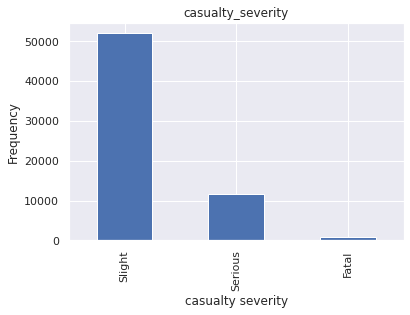

In [104]:
categorical_plot(x_accident_train, 'casualty_severity', ["Fatal", "Serious", "Slight"], 3)

The casualty severity of most cases is slight meaning no major damage was dealt.

**7.4 Special Variables**

The numeric variables Longitude and Latitude can be used to map out the various locations in which accidents have occurred. These locations can be further assesed to provide better facilities in accident-prone areas.

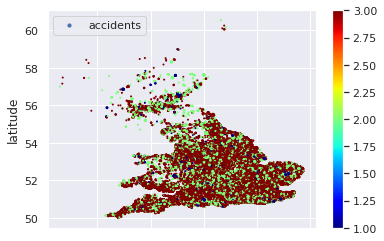

In [105]:
# Plotting the accident severity observed using latitude and longitude
x_accident_train.plot(kind="scatter", x="longitude", y="latitude", s=x_accident_train["number_of_casualties"],
                      label="accidents", alpha=1, c=y_accident_train, cmap=plt.get_cmap("jet"), colorbar=True, )
plt.legend()
plt.show()

The following plot shows the general outline of the UK using all the various instances of accidents for the year 2020.

##**8.0 One hot encoding**

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.


In [106]:
# Loading library for one hot encoder
from sklearn.preprocessing import OneHotEncoder

# Function for one hot encoding
def category_missing(trainset, column):
    one_hot_encoder = OneHotEncoder(drop=None, sparse=False)
    cat_vals = trainset[column].values.reshape(-1, 1)
    transformed = one_hot_encoder.fit_transform(cat_vals)
    # put the transformed data as columns in the dataframe
    col_names = one_hot_encoder.categories_[0].tolist()
    for i, col_name in enumerate(col_names):
        heading = column+'_'+str(int(col_name))
        trainset[heading] = transformed[:, i]
    return trainset

In [107]:
trainset_numerical = x_accident_train[["speed_limit", "age_of_vehicle", 
                                       "engine_capacity_cc", 
                                       "number_of_casualties", 
                                       "number_of_vehicles"]]
testset_numerical = x_accident_test[["speed_limit", "age_of_vehicle", 
                                     "engine_capacity_cc", 
                                     "number_of_casualties", "number_of_vehicles"]]
trainset_categorical = x_accident_train.drop(["speed_limit", "age_of_vehicle", 
                                              "engine_capacity_cc", 
                                              "number_of_casualties", 
                                              "number_of_vehicles"], axis=1)
testset_categorical = x_accident_test.drop(["speed_limit", "age_of_vehicle", 
                                            "engine_capacity_cc", 
                                            "number_of_casualties", 
                                            "number_of_vehicles"], axis=1)

categorical_columns = list(trainset_categorical.columns)

for column_deletion in ['latitude', 'longitude', 'driver_home_area_type']:
  categorical_columns.remove(column_deletion)
for element in categorical_columns:
    trainset_categorical = category_missing(trainset_categorical, element)
    testset_categorical = category_missing(testset_categorical, element)
x_accident_train = pd.merge(trainset_numerical, trainset_categorical, left_index=True,
                            right_index=True, how='outer')
x_accident_test = pd.merge(testset_numerical, testset_categorical, left_index=True,
                            right_index=True, how='outer')
print(x_accident_train.shape)
print(x_accident_test.shape)
x_accident_train

(64674, 140)
(27718, 140)


,speed_limit,age_of_vehicle,engine_capacity_cc,number_of_casualties,number_of_vehicles,first_point_of_impact,trunk_road_flag,urban_or_rural_area,age_band_of_casualty,vehicle_leaving_carriageway,...,second_road_class_6,sex_of_casualty_1,sex_of_casualty_2,sex_of_driver_1,sex_of_driver_2,did_police_officer_attend_scene_of_accident_1,did_police_officer_attend_scene_of_accident_2,casualty_severity_1,casualty_severity_2,casualty_severity_3
0,60.0,4.0,1499.0,2.0,2.0,4.0,2.0,2.0,6.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,30.0,16.0,1598.0,1.0,2.0,4.0,2.0,1.0,7.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,40.0,6.0,1398.0,2.0,2.0,2.0,2.0,1.0,6.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,40.0,8.0,1560.0,1.0,2.0,1.0,2.0,2.0,9.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,30.0,8.0,1560.0,2.0,2.0,1.0,2.0,1.0,9.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64669,30.0,8.0,1560.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
64670,60.0,17.0,1999.0,2.0,2.0,1.0,2.0,2.0,11.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
64671,60.0,10.0,998.0,3.0,3.0,2.0,2.0,2.0,6.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
64672,30.0,8.0,1560.0,1.0,1.0,3.0,2.0,1.0,6.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


**9.0 Conclusion**

This group project was successfully able to explore important variables from accident, casuality and vehicle datasets. Features were selected based on predictors that can be obtained immediately from the crash site and have a high correlation with accident severity. By predicting the dataset explored above, emergency services should be able to prioritise first aid dispatch to the required accident site.
The individual project executed by each group member will execute ML algorithms to predict accident severity on y_accident_test and discuss its accuracy.

In [108]:
x_accident_train.drop(["junction_location", "second_road_class",
                       "did_police_officer_attend_scene_of_accident",
                       "casualty_severity", "sex_of_casualty", "sex_of_driver",
                       "vehicle_location_restricted_lane", "number_of_vehicles",
                       "weather_conditions", "driver_imd_decile", 
                       "skidding_and_overturning", "driver_home_area_type", 
                       "road_type", "age_band_of_driver", "casualty_class", 
                       "light_conditions", "vehicle_leaving_carriageway", 
                       "age_band_of_casualty", "number_of_casualties", 
                       "urban_or_rural_area", "trunk_road_flag", 
                       "first_point_of_impact"],inplace=True, axis=1)
x_accident_test.drop(["junction_location", "second_road_class",
                      "did_police_officer_attend_scene_of_accident", 
                      "casualty_severity", "sex_of_casualty", "sex_of_driver", 
                      "vehicle_location_restricted_lane", "number_of_vehicles", 
                      "weather_conditions", "driver_imd_decile", 
                      "skidding_and_overturning", "driver_home_area_type", 
                      "road_type", "age_band_of_driver", "casualty_class", 
                      "light_conditions", "vehicle_leaving_carriageway", 
                      "age_band_of_casualty", "number_of_casualties", 
                      "urban_or_rural_area", "trunk_road_flag", 
                      "first_point_of_impact"],inplace=True, axis=1)
print(x_accident_train.shape)
print(x_accident_test.shape)

(64674, 118)
(27718, 118)


**10.0 Data Exporting**

After the conclusion of the Group assignment, we can now pass on the transformed and split datasets to the Individual assignment by
exporting them to csv files.

In [109]:
x_accident_train.to_csv("/content/gdrive/My Drive/Colab Notebooks/Content/x_accident_train.csv")
x_accident_test.to_csv("/content/gdrive/My Drive/Colab Notebooks/Content/x_accident_test.csv")
y_accident_train.to_csv("/content/gdrive/My Drive/Colab Notebooks/Content/y_accident_train.csv")
y_accident_test.to_csv("/content/gdrive/My Drive/Colab Notebooks/Content/y_accident_test.csv")

In [110]:
# Finish Timer
notebook_duration = round((time.time() - Start_time)/60, 5)
print(f'The completion of the notebook took {notebook_duration} minutes.')

The completion of the notebook took 0.46038 minutes.
